# draft

In [114]:
import pandas as pd
import numpy as np
from plotnine import *
import matplotlib.pyplot as plt

In [ ]:
## df


## 판다스: melt, stack

### melt

### stack

In [130]:
df=pd.read_csv('https://raw.githubusercontent.com/PacktPublishing/Pandas-Cookbook/master/data/flights.csv')\
.groupby(["AIRLINE","WEEKDAY"]).agg({"CANCELLED":[np.sum,"count"],"DIVERTED":[np.mean,"count"]})
df

CANCELLED        DIVERTED      
                      sum count      mean count
AIRLINE WEEKDAY                                
AA      1              41  1277  0.004699  1277
        2               9  1226  0.001631  1226
        3              16  1339  0.001494  1339
        4              20  1333  0.003751  1333
        5              18  1272  0.000786  1272
...                   ...   ...       ...   ...
WN      3              18  1275  0.001569  1275
        4              10  1264  0.003165  1264
        5               7  1201  0.000000  1201
        6              10   987  0.003040   987
        7               7  1154  0.002600  1154

[98 rows x 4 columns]

In [85]:
gf.stack().stack().reset_index()

,AIRLINE,WEEKDAY,level_2,level_3,asdf
0,AA,1,count,CANCELLED,1277.000000
1,AA,1,count,DIVERTED,1277.000000
2,AA,1,mean,DIVERTED,0.004699
3,AA,1,sum,CANCELLED,41.000000
4,AA,2,count,CANCELLED,1226.000000
...,...,...,...,...,...
387,WN,6,sum,CANCELLED,10.000000
388,WN,7,count,CANCELLED,1154.000000
389,WN,7,count,DIVERTED,1154.000000
390,WN,7,mean,DIVERTED,0.002600


In [ ]:
gf.stack().stack().reset_index()

,AIRLINE,WEEKDAY,level_2,level_3,0
0,AA,1,sum,CANCELLED,41.000000
1,AA,1,sum,DIVERTED,6.000000
2,AA,1,mean,CANCELLED,0.032106
3,AA,1,mean,DIVERTED,0.004699
4,AA,2,sum,CANCELLED,9.000000
...,...,...,...,...,...
387,WN,6,mean,DIVERTED,0.003040
388,WN,7,sum,CANCELLED,7.000000
389,WN,7,sum,DIVERTED,3.000000
390,WN,7,mean,CANCELLED,0.006066


In [90]:
df.set_index('Date').stack().unstack()

KeyError: "None of ['Date'] are in the columns"

In [37]:
df

,Date,Samsung,Apple,Huawei,Xiaomi,Oppo,Mobicel,Motorola,LG,Others,Realme,Google,Nokia,Lenovo,OnePlus,Sony,Asus
0,2019-10,461,324,136,109,76,81,43,37,135,28,39,14,22,17,20,17
1,2019-11,461,358,167,141,86,61,29,36,141,27,29,20,23,10,19,27
2,2019-12,426,383,143,105,53,45,51,48,129,30,20,26,28,18,18,19
3,2020-01,677,494,212,187,110,79,65,49,158,23,13,19,19,22,27,22
4,2020-02,593,520,217,195,112,67,62,71,157,25,18,16,24,18,23,20
5,2020-03,637,537,246,187,92,66,59,67,145,21,16,24,18,31,22,14
6,2020-04,647,583,222,154,98,59,48,64,113,20,23,25,19,19,23,21
7,2020-05,629,518,192,176,91,87,50,66,150,43,27,15,18,19,19,13
8,2020-06,663,552,209,185,93,69,54,60,140,39,16,16,17,29,25,16
9,2020-07,599,471,214,193,89,78,65,59,130,40,27,25,21,18,18,12


In [42]:
df.melt(id_vars='Date').query('variable=="Samsung"')

,Date,variable,value
0,2019-10,Samsung,461
1,2019-11,Samsung,461
2,2019-12,Samsung,426
3,2020-01,Samsung,677
4,2020-02,Samsung,593
5,2020-03,Samsung,637
6,2020-04,Samsung,647
7,2020-05,Samsung,629
8,2020-06,Samsung,663
9,2020-07,Samsung,599


## tidydata

### tidydata의 정의 

`-` 느낌: ggplot으로 그림 그리기 좋은 데이터 + pandas로 query, group by 등을 쓰기 좋은 자료 

`-` 정의: https://r4ds.had.co.nz/tidy-data.html
- Each variable must have its own column.
- Each observation must have its own row.
- Each value must have its own cell.

예시1 (tidy data) 

|obs|x|y|shape|color|
|:-:|:-:|:-:|:-:|:-:|
|0|0|0 |'star'|'F'|
|1|0|1 |'circ'|'F'|
|2|1|0 |'star'|'M'|
|3|1|1 |'circ'|'M'|

예시2 (tidy data x)

| |shape=star|shape=circ|
|:-:|:-:|:-:|
|color=F|(0,0)|(0,1)|
|color=M|(1,0)|(1,1)|



### 예제1: long df

`-` https://raw.githubusercontent.com/PacktPublishing/Pandas-Cookbook/master/data/state_fruit.csv

In [4]:
df=pd.read_csv('https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/phone.csv')
df

,Date,Samsung,Apple,Huawei,Xiaomi,Oppo,Mobicel,Motorola,LG,Others,Realme,Google,Nokia,Lenovo,OnePlus,Sony,Asus
0,2019-10,461,324,136,109,76,81,43,37,135,28,39,14,22,17,20,17
1,2019-11,461,358,167,141,86,61,29,36,141,27,29,20,23,10,19,27
2,2019-12,426,383,143,105,53,45,51,48,129,30,20,26,28,18,18,19
3,2020-01,677,494,212,187,110,79,65,49,158,23,13,19,19,22,27,22
4,2020-02,593,520,217,195,112,67,62,71,157,25,18,16,24,18,23,20
5,2020-03,637,537,246,187,92,66,59,67,145,21,16,24,18,31,22,14
6,2020-04,647,583,222,154,98,59,48,64,113,20,23,25,19,19,23,21
7,2020-05,629,518,192,176,91,87,50,66,150,43,27,15,18,19,19,13
8,2020-06,663,552,209,185,93,69,54,60,140,39,16,16,17,29,25,16
9,2020-07,599,471,214,193,89,78,65,59,130,40,27,25,21,18,18,12


#### 풀이1: stack + reset_index  

In [302]:
url = 'https://raw.githubusercontent.com/PacktPublishing/Pandas-Cookbook/master/data/state_fruit.csv'
df=pd.read_csv(url,index_col=0)
df

,Apple,Orange,Banana
Texas,12,10,40
Arizona,9,7,12
Florida,0,14,190


`-` 데이터변형

In [305]:
df.stack()

Date            
2019-10  Samsung    461
         Apple      324
         Huawei     136
         Xiaomi     109
         Oppo        76
                   ... 
2020-10  Nokia       20
         Lenovo      22
         OnePlus      9
         Sony        22
         Asus        21
Length: 208, dtype: int64

In [306]:
df.stack().reset_index()

,Date,level_1,0
0,2019-10,Samsung,461
1,2019-10,Apple,324
2,2019-10,Huawei,136
3,2019-10,Xiaomi,109
4,2019-10,Oppo,76
...,...,...,...
203,2020-10,Nokia,20
204,2020-10,Lenovo,22
205,2020-10,OnePlus,9
206,2020-10,Sony,22


In [307]:
df.stack().reset_index().rename(columns={'level_0':'group1','level_1':'group2',0:'X'})

,Date,group2,X
0,2019-10,Samsung,461
1,2019-10,Apple,324
2,2019-10,Huawei,136
3,2019-10,Xiaomi,109
4,2019-10,Oppo,76
...,...,...,...
203,2020-10,Nokia,20
204,2020-10,Lenovo,22
205,2020-10,OnePlus,9
206,2020-10,Sony,22


#### 풀이2: melt(id_vars=??)

`-` `index_col=0` 옵션을 사용하지않음 

In [308]:
url = 'https://raw.githubusercontent.com/PacktPublishing/Pandas-Cookbook/master/data/state_fruit.csv'
df2=pd.read_csv(url)
df2

,Unnamed: 0,Apple,Orange,Banana
0,Texas,12,10,40
1,Arizona,9,7,12
2,Florida,0,14,190


In [309]:
df2.rename(columns={'Unnamed: 0':'group1'})

,group1,Apple,Orange,Banana
0,Texas,12,10,40
1,Arizona,9,7,12
2,Florida,0,14,190


In [310]:
df2.rename(columns={'Unnamed: 0':'group1'}).melt(id_vars='group1')

,group1,variable,value
0,Texas,Apple,12
1,Arizona,Apple,9
2,Florida,Apple,0
3,Texas,Orange,10
4,Arizona,Orange,7
5,Florida,Orange,14
6,Texas,Banana,40
7,Arizona,Banana,12
8,Florida,Banana,190


In [311]:
df2.rename(columns={'Unnamed: 0':'group1'}).melt(id_vars='group1')\
.rename(columns={'variable':'group2','value':'X'})

,group1,group2,X
0,Texas,Apple,12
1,Arizona,Apple,9
2,Florida,Apple,0
3,Texas,Orange,10
4,Arizona,Orange,7
5,Florida,Orange,14
6,Texas,Banana,40
7,Arizona,Banana,12
8,Florida,Banana,190


#### 틀린풀이1

In [312]:
df

,Samsung,Apple,Huawei,Xiaomi,Oppo,Mobicel,Motorola,LG,Others,Realme,Google,Nokia,Lenovo,OnePlus,Sony,Asus
Date,,,,,,,,,,,,,,,,
2019-10,461,324,136,109,76,81,43,37,135,28,39,14,22,17,20,17
2019-11,461,358,167,141,86,61,29,36,141,27,29,20,23,10,19,27
2019-12,426,383,143,105,53,45,51,48,129,30,20,26,28,18,18,19
2020-01,677,494,212,187,110,79,65,49,158,23,13,19,19,22,27,22
2020-02,593,520,217,195,112,67,62,71,157,25,18,16,24,18,23,20
2020-03,637,537,246,187,92,66,59,67,145,21,16,24,18,31,22,14
2020-04,647,583,222,154,98,59,48,64,113,20,23,25,19,19,23,21
2020-05,629,518,192,176,91,87,50,66,150,43,27,15,18,19,19,13
2020-06,663,552,209,185,93,69,54,60,140,39,16,16,17,29,25,16


In [313]:
df.melt()

,variable,value
0,Samsung,461
1,Samsung,461
2,Samsung,426
3,Samsung,677
4,Samsung,593
...,...,...
203,Asus,16
204,Asus,12
205,Asus,20
206,Asus,15


#### 틀린풀이2

In [314]:
df2

,Unnamed: 0,Apple,Orange,Banana
0,Texas,12,10,40
1,Arizona,9,7,12
2,Florida,0,14,190


In [315]:
df2.stack()

0  Unnamed: 0      Texas
   Apple              12
   Orange             10
   Banana             40
1  Unnamed: 0    Arizona
   Apple               9
   Orange              7
   Banana             12
2  Unnamed: 0    Florida
   Apple               0
   Orange             14
   Banana            190
dtype: object

#### 풀이3 

In [316]:
df

,Samsung,Apple,Huawei,Xiaomi,Oppo,Mobicel,Motorola,LG,Others,Realme,Google,Nokia,Lenovo,OnePlus,Sony,Asus
Date,,,,,,,,,,,,,,,,
2019-10,461,324,136,109,76,81,43,37,135,28,39,14,22,17,20,17
2019-11,461,358,167,141,86,61,29,36,141,27,29,20,23,10,19,27
2019-12,426,383,143,105,53,45,51,48,129,30,20,26,28,18,18,19
2020-01,677,494,212,187,110,79,65,49,158,23,13,19,19,22,27,22
2020-02,593,520,217,195,112,67,62,71,157,25,18,16,24,18,23,20
2020-03,637,537,246,187,92,66,59,67,145,21,16,24,18,31,22,14
2020-04,647,583,222,154,98,59,48,64,113,20,23,25,19,19,23,21
2020-05,629,518,192,176,91,87,50,66,150,43,27,15,18,19,19,13
2020-06,663,552,209,185,93,69,54,60,140,39,16,16,17,29,25,16


In [317]:
df.reset_index()

,Date,Samsung,Apple,Huawei,Xiaomi,Oppo,Mobicel,Motorola,LG,Others,Realme,Google,Nokia,Lenovo,OnePlus,Sony,Asus
0,2019-10,461,324,136,109,76,81,43,37,135,28,39,14,22,17,20,17
1,2019-11,461,358,167,141,86,61,29,36,141,27,29,20,23,10,19,27
2,2019-12,426,383,143,105,53,45,51,48,129,30,20,26,28,18,18,19
3,2020-01,677,494,212,187,110,79,65,49,158,23,13,19,19,22,27,22
4,2020-02,593,520,217,195,112,67,62,71,157,25,18,16,24,18,23,20
5,2020-03,637,537,246,187,92,66,59,67,145,21,16,24,18,31,22,14
6,2020-04,647,583,222,154,98,59,48,64,113,20,23,25,19,19,23,21
7,2020-05,629,518,192,176,91,87,50,66,150,43,27,15,18,19,19,13
8,2020-06,663,552,209,185,93,69,54,60,140,39,16,16,17,29,25,16
9,2020-07,599,471,214,193,89,78,65,59,130,40,27,25,21,18,18,12


In [318]:
df.reset_index().melt(id_vars='index')

KeyError: 'index'

In [70]:
df.reset_index().melt(id_vars='index')\
.rename(columns={'index':'group1','variable':'group2','value':'X'})

,group1,group2,X
0,Texas,Apple,12
1,Arizona,Apple,9
2,Florida,Apple,0
3,Texas,Orange,10
4,Arizona,Orange,7
5,Florida,Orange,14
6,Texas,Banana,40
7,Arizona,Banana,12
8,Florida,Banana,190


#### 풀이4

In [78]:
df2.set_index('Unnamed: 0')

,Apple,Orange,Banana
Unnamed: 0,,,
Texas,12,10,40
Arizona,9,7,12
Florida,0,14,190


In [79]:
df2.set_index('Unnamed: 0').stack()

Unnamed: 0        
Texas       Apple      12
            Orange     10
            Banana     40
Arizona     Apple       9
            Orange      7
            Banana     12
Florida     Apple       0
            Orange     14
            Banana    190
dtype: int64

In [80]:
df2.set_index('Unnamed: 0').stack().reset_index()

,Unnamed: 0,level_1,0
0,Texas,Apple,12
1,Texas,Orange,10
2,Texas,Banana,40
3,Arizona,Apple,9
4,Arizona,Orange,7
5,Arizona,Banana,12
6,Florida,Apple,0
7,Florida,Orange,14
8,Florida,Banana,190


In [81]:
df2.set_index('Unnamed: 0').stack().reset_index()\
.rename(columns={'Unnamed: 0':'group1','level_1':'group2',0:'X'})

,group1,group2,X
0,Texas,Apple,12
1,Texas,Orange,10
2,Texas,Banana,40
3,Arizona,Apple,9
4,Arizona,Orange,7
5,Arizona,Banana,12
6,Florida,Apple,0
7,Florida,Orange,14
8,Florida,Banana,190


### 예제2: multi-indexed data

## barplot 

### 기본사용법

In [106]:
g=['A']*100+['B']*200 
y=list(np.random.randn(100)*2+2)+list(np.random.randn(200)+3)
df=pd.DataFrame({'g':g,'y':y})
df

,g,y
0,A,1.512043
1,A,2.607010
2,A,4.680375
3,A,3.696806
4,A,3.297729
...,...,...
295,B,3.239580
296,B,2.391294
297,B,3.434171
298,B,1.774713


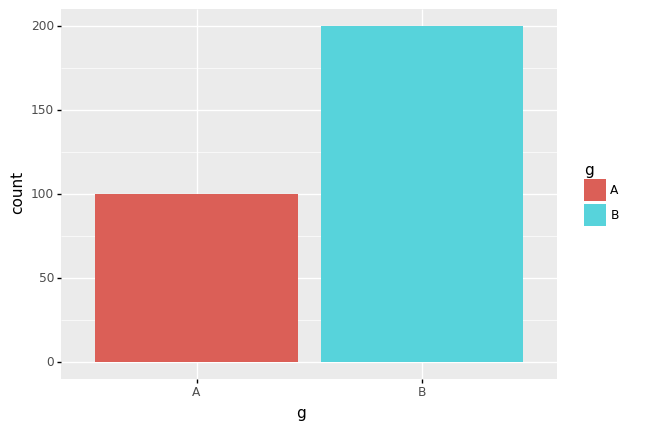

<ggplot: (8739005569593)>

In [107]:
ggplot(df)+geom_bar(aes(x='g',fill='g')) ## 디폴트로 카운트를 수행해줌

`-` 이것은 아래의 코드와 같다. 

In [109]:
df.groupby(by='g').count().reset_index()

,g,y
0,A,100
1,B,200


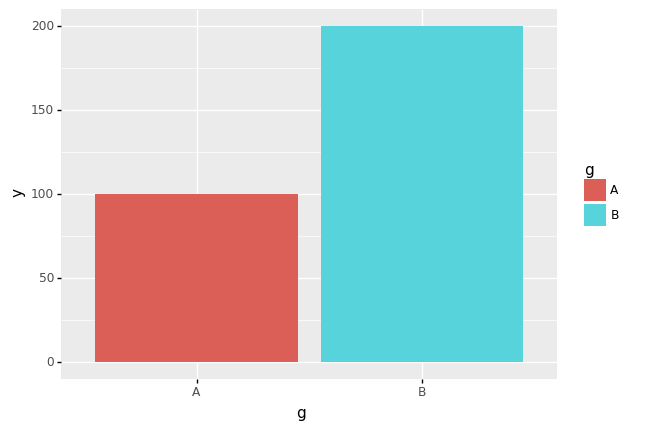

<ggplot: (8739005498849)>

In [110]:
fig=ggplot(df.groupby(by='g').count().reset_index())
fig+geom_bar(aes(x='g',y='y',fill='g'),stat='identity')

`-` barplot은 기본적으로 groupby+count()가 내장되어 있다. 따라서 아래의 코드 

```r
ggplot(df)+geom_bar(aes(x='g',fill='g')) ## 디폴트로 카운트를 수행해줌
```

를 좀더 엄밀하게 쓰면 

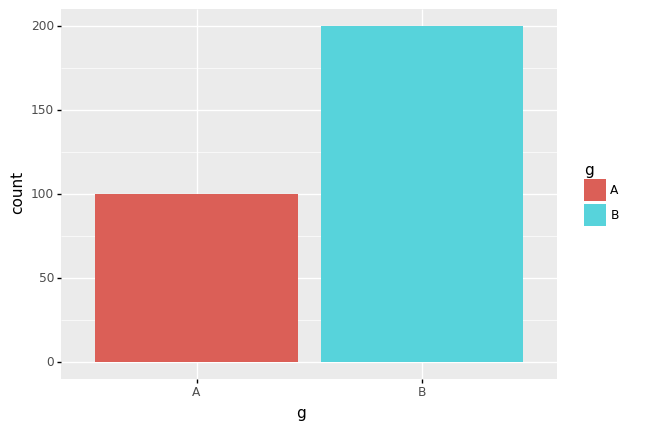

<ggplot: (8739005445657)>

In [111]:
ggplot(df)+geom_bar(aes(x='g',fill='g'),stat='count') 

`-` 이것은 때때로 불편하다. 왜냐하면 데이터프레임을 변환하는 것은 판다스를 이용하는게 더 쉽고 자유로움 

### barplot의 불편한점1

In [112]:
td=df.groupby(by='g').count().reset_index()
td

,g,y
0,A,100
1,B,200


`-` 그냥 'x=g, y=y'를 맵핑하여 그리면 안되나? 

<BarContainer object of 2 artists>

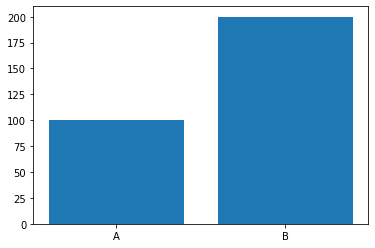

In [115]:
plt.bar(td.g,td.y)

<AxesSubplot:xlabel='g'>

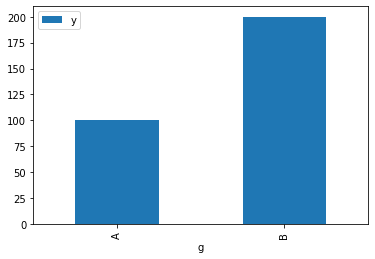

In [116]:
td.plot(kind='bar',x='g',y='y')

`-` 그런데 ggplot을 쓰려고 하면?

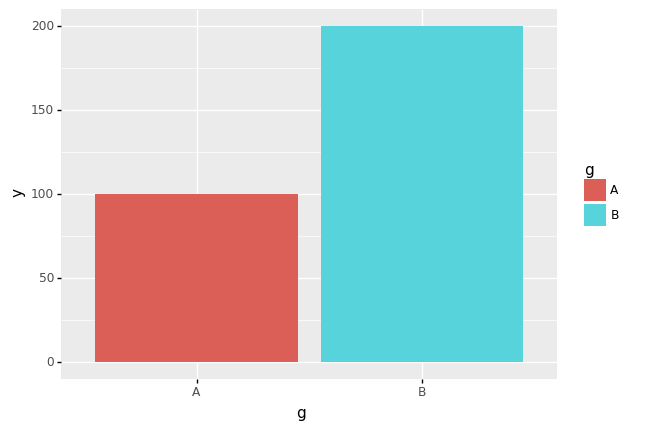

<ggplot: (8739005441005)>

In [118]:
ggplot(td)+geom_bar(aes(x='g',y='y',fill='g'),stat='identity') 

- 너무 불편해요.. stat='identity' 를 항상 써야하는것이!

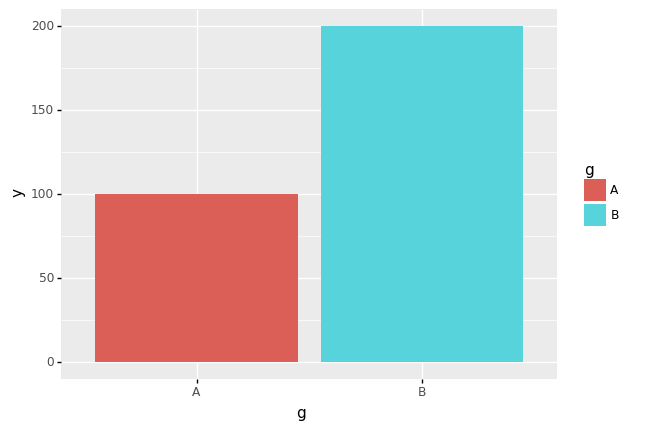

<ggplot: (8739005254909)>

In [119]:
ggplot(td)+geom_col(aes(x='g',y='y',fill='g')) 

- 그럴땐 그냥 geom_col 을 하면 된다. 

### barplot의 불편한점2

`-` groupby 를 자동으로 해주므로 익숙해지면 ggplot2 방식이 더 편하지 않을까? $\to$ groupby 하는게 더 편해요.. 

In [121]:
df.groupby('g').agg({'y':[np.mean,np.median,np.std,lambda x: np.max(x)-np.min(x)]})

y                               
       mean    median       std <lambda_0>
g                                         
A  2.375419  2.638854  1.963668   8.888167
B  2.933778  2.835038  1.033119   5.049888

In [122]:
df.groupby('g')\
.agg({'y':[np.mean,np.median,np.std,lambda x: np.max(x)-np.min(x)]})\
.rename(columns={'<lambda_0>':'range'}).stack().reset_index()

,g,level_1,y
0,A,mean,2.375419
1,A,median,2.638854
2,A,range,8.888167
3,A,std,1.963668
4,B,mean,2.933778
5,B,median,2.835038
6,B,range,5.049888
7,B,std,1.033119


In [123]:
td=df.groupby('g')\
.agg({'y':[np.mean,np.median,np.std,lambda x: np.max(x)-np.min(x)]})\
.rename(columns={'<lambda_0>':'range'}).stack().reset_index()

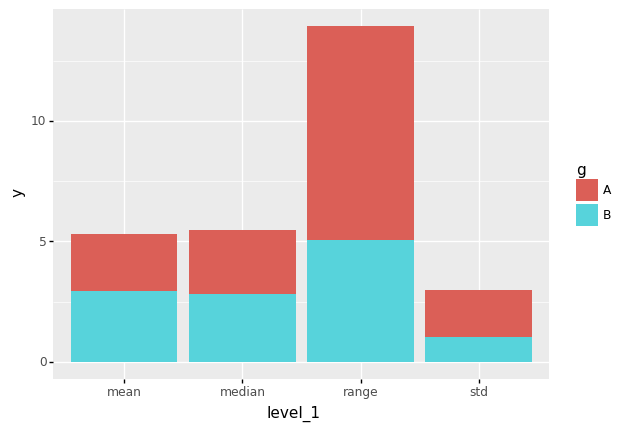

<ggplot: (8739005188705)>

In [124]:
ggplot(td)+geom_col(aes(x='level_1',y='y',fill='g'))

- 쌓인상태로 보이는것이 불편함. $\to$ position='dodge' 로!

### position 

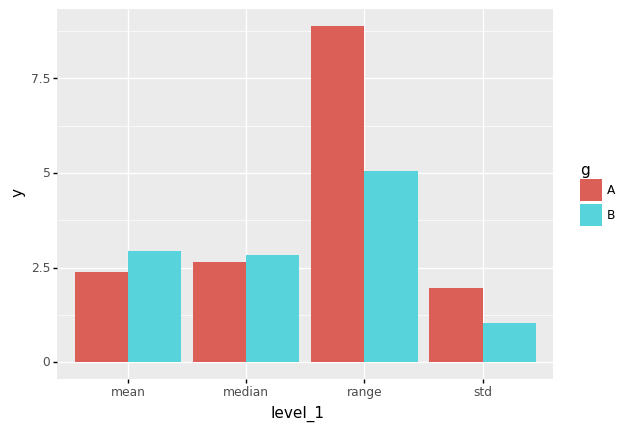

<ggplot: (8739005159325)>

In [125]:
ggplot(td)+geom_col(aes(x='level_1',y='y',fill='g'),position='dodge')

### coord_flip()

`-` 때때로 아래와 같이 보는 것이 더 좋은 경우도 있음 

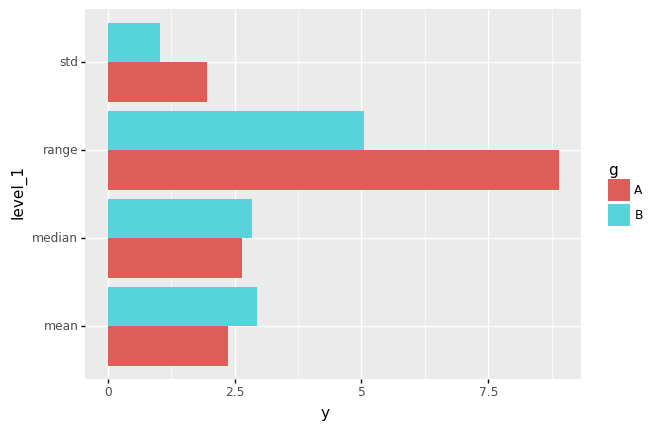

<ggplot: (8739005226097)>

In [126]:
ggplot(td)\
+geom_col(aes(x='level_1',y='y',fill='g'),position='dodge')\
+coord_flip()

### facet_wrap()

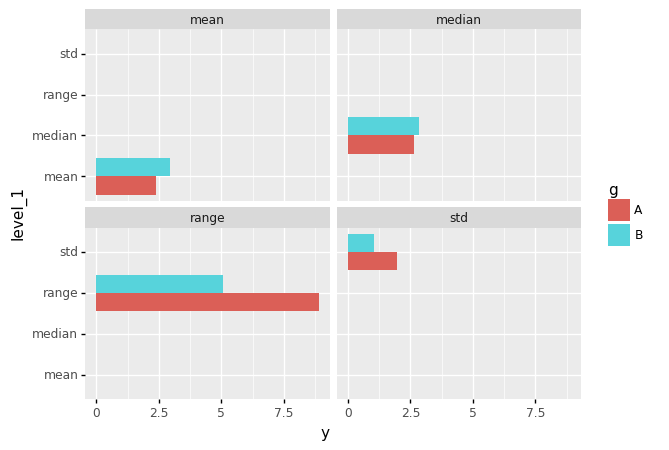

<ggplot: (8739005194125)>

In [127]:
ggplot(td)\
+geom_col(aes(x='level_1',y='y',fill='g'),position='dodge')\
+coord_flip()+facet_wrap('level_1')

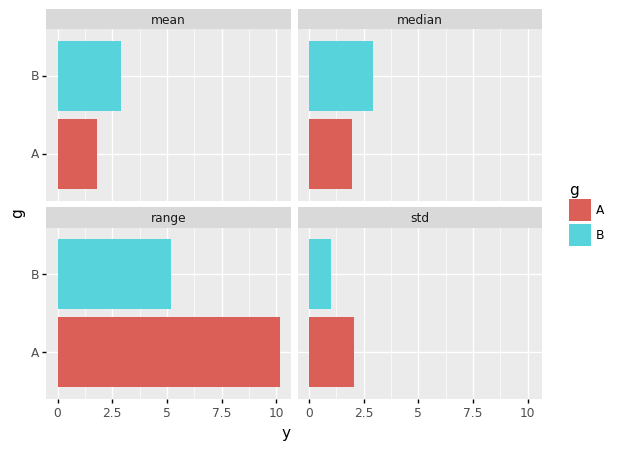

<ggplot: (8726958748290)>

In [158]:
ggplot(td)\
+geom_bar(aes(x='g',y='y',fill='g'),stat='identity',position='dodge')\
+coord_flip()+facet_wrap('level_1')

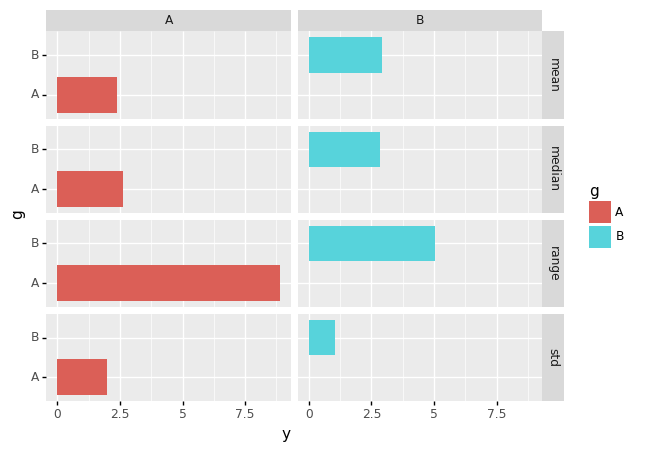

<ggplot: (8739004934113)>

In [128]:
ggplot(td)+facet_grid('level_1~g')\
+geom_col(aes(x='g',y='y',fill='g'),position='dodge')+coord_flip()

## 해들리위컴의 그래프레이어

`-` data + aes + geom + position + stat + coord + facet
- data: pandas dataframe 
- aes: x축, y축, 색깔, 크기, 투명도 
- geom: 포인트지옴, 바지옴, 라인지옴, 스무스지옴 
- position: jitter, dodge, intentity 
- stat: identity, count 
- coord: coord_flip()
- facet: facet_wrap(), facet_grid()

`-` 해들리위컴의 주장: ggplot2는 자료가 tidydata형태로 정리되어 있을경우 해들리위컴의 그래프레이어에 따라 시각화하는 최상의 툴이다.

`-` 내 생각
- 해들리위컴의 그래프레이어는 tabular data에 한정하여 맞는 개념임 (그런데 요즘은 안그런 데이터도 있어) 
- tabular data라고 할지라도 ggplot2의 보다 좀 더 좋은 시각화 툴이 개발되었다고 생각 (plotly 등) 

## 심슨의 역설

In [91]:
DEP=(['A1']*2+['A2']*2+['B1']*2+['B2']*2)*2 
GEN=['M']*8+['F']*8
STATE=['PASS','FAIL']*8
COUNT=[1,9,2,8,80,20,85,15,5,5,5,5,9,1,9,1]

In [92]:
df=pd.DataFrame({'DEP':DEP,'STATE':STATE,'GEN':GEN,'COUNT':COUNT})

In [95]:
df

,DEP,STATE,GEN,COUNT
0,A1,PASS,M,1
1,A1,FAIL,M,9
2,A2,PASS,M,2
3,A2,FAIL,M,8
4,B1,PASS,M,80
5,B1,FAIL,M,20
6,B2,PASS,M,85
7,B2,FAIL,M,15
8,A1,PASS,F,5
9,A1,FAIL,F,5


In [172]:
df.groupby(['GEN','STATE']).agg({'COUNT':np.sum})

COUNT
GEN STATE       
F   FAIL      12
    PASS      28
M   FAIL      52
    PASS     168

### 시각화1: 전체합격률

In [177]:
df.groupby(['GEN','STATE']).agg({'COUNT':np.sum})

COUNT
GEN STATE       
F   FAIL      12
    PASS      28
M   FAIL      52
    PASS     168

In [178]:
df.groupby(['GEN','STATE']).agg({'COUNT':np.sum}).reset_index()

,GEN,STATE,COUNT
0,F,FAIL,12
1,F,PASS,28
2,M,FAIL,52
3,M,PASS,168


In [179]:
df.groupby(['GEN']).agg({'COUNT':np.sum}).reset_index()

,GEN,COUNT
0,F,40
1,M,220


`-` 두개의 데이터프레임을 합쳐야 한다. 

In [226]:
_df1=df.groupby(['GEN','STATE']).agg({'COUNT':np.sum}).reset_index()
_df2=df.groupby(['GEN']).agg({'COUNT':np.sum}).reset_index().rename(columns={'COUNT':'SUM'})

In [227]:
display(_df1)
display(_df2)

,GEN,STATE,COUNT
0,F,FAIL,12
1,F,PASS,28
2,M,FAIL,52
3,M,PASS,168


,GEN,SUM
0,F,40
1,M,220


`-` 단순한 방법

In [228]:
def f(x): 
    if x=='F':
        return 40 
    if x=='M':
        return 220 

In [229]:
_df1['SUM']=list(map(f,_df1.GEN))
_df1

,GEN,STATE,COUNT,SUM
0,F,FAIL,12,40
1,F,PASS,28,40
2,M,FAIL,52,220
3,M,PASS,168,220


`-` 좀 더 좋은 방법 

In [230]:
_df1=df.groupby(['GEN','STATE']).agg({'COUNT':np.sum}).reset_index()

- _df1를 다시 롤백

In [231]:
def f(_df2): 
    return lambda x: _df2.query('GEN == @x').SUM.item()

In [232]:
_df1.GEN

0    F
1    F
2    M
3    M
Name: GEN, dtype: object

In [233]:
_df1['SUM']=list(map(f(_df2),_df1.GEN))
_df1

,GEN,STATE,COUNT,SUM
0,F,FAIL,12,40
1,F,PASS,28,40
2,M,FAIL,52,220
3,M,PASS,168,220


`-` 더 좋은 방법

In [234]:
_df1=df.groupby(['GEN','STATE']).agg({'COUNT':np.sum}).reset_index()

- _df1을 다시 롤백

In [236]:
_df1

,GEN,STATE,COUNT
0,F,FAIL,12
1,F,PASS,28
2,M,FAIL,52
3,M,PASS,168


In [237]:
_df2

,GEN,SUM
0,F,40
1,M,220


In [235]:
pd.merge(_df1,_df2)

,GEN,STATE,COUNT,SUM
0,F,FAIL,12,40
1,F,PASS,28,40
2,M,FAIL,52,220
3,M,PASS,168,220


In [239]:
_df1.merge(_df2)

,GEN,STATE,COUNT,SUM
0,F,FAIL,12,40
1,F,PASS,28,40
2,M,FAIL,52,220
3,M,PASS,168,220


In [240]:
_df2.merge(_df1)

,GEN,SUM,STATE,COUNT
0,F,40,FAIL,12
1,F,40,PASS,28
2,M,220,FAIL,52
3,M,220,PASS,168


In [244]:
td=_df2.merge(_df1)
td

,GEN,SUM,STATE,COUNT
0,F,40,FAIL,12
1,F,40,PASS,28
2,M,220,FAIL,52
3,M,220,PASS,168


In [245]:
td['PROP']=td.COUNT/td.SUM

In [246]:
td

,GEN,SUM,STATE,COUNT,PROP
0,F,40,FAIL,12,0.300000
1,F,40,PASS,28,0.700000
2,M,220,FAIL,52,0.236364
3,M,220,PASS,168,0.763636


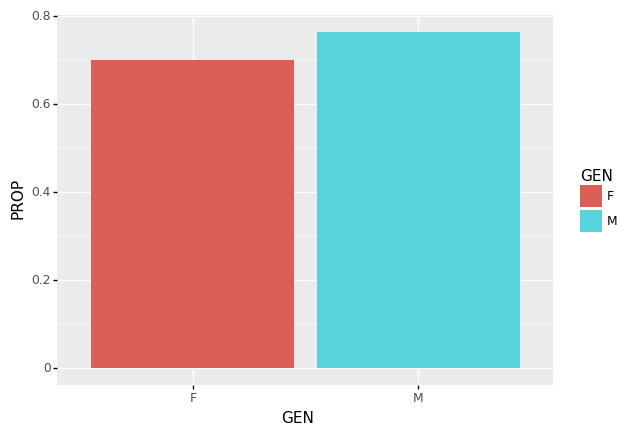

<ggplot: (8726958443650)>

In [249]:
ggplot(td.query('STATE=="PASS"'))+geom_bar(aes(x='GEN',y='PROP',fill='GEN'),stat='identity')

`-` 남자의 합격률이 더 높다. $\to$ 성차별이 있어보인다(?)

### 시각화2: 학과별 합격률

`-` 학과별 합격률 

In [281]:
df

,DEP,STATE,GEN,COUNT
0,A1,PASS,M,1
1,A1,FAIL,M,9
2,A2,PASS,M,2
3,A2,FAIL,M,8
4,B1,PASS,M,80
5,B1,FAIL,M,20
6,B2,PASS,M,85
7,B2,FAIL,M,15
8,A1,PASS,F,5
9,A1,FAIL,F,5


In [286]:
td=df.groupby(['DEP','GEN']).agg({'COUNT':sum}).reset_index()\
.rename(columns={'COUNT':'SUM'}).merge(df)

In [288]:
td['PROP']=td.COUNT/td.SUM

In [289]:
td

,DEP,GEN,SUM,STATE,COUNT,PROP
0,A1,F,10,PASS,5,0.50
1,A1,F,10,FAIL,5,0.50
2,A1,M,10,PASS,1,0.10
3,A1,M,10,FAIL,9,0.90
4,A2,F,10,PASS,5,0.50
5,A2,F,10,FAIL,5,0.50
6,A2,M,10,PASS,2,0.20
7,A2,M,10,FAIL,8,0.80
8,B1,F,10,PASS,9,0.90
9,B1,F,10,FAIL,1,0.10


In [290]:
td.query('STATE=="PASS"')

,DEP,GEN,SUM,STATE,COUNT,PROP
0,A1,F,10,PASS,5,0.50
2,A1,M,10,PASS,1,0.10
4,A2,F,10,PASS,5,0.50
6,A2,M,10,PASS,2,0.20
8,B1,F,10,PASS,9,0.90
10,B1,M,100,PASS,80,0.80
12,B2,F,10,PASS,9,0.90
14,B2,M,100,PASS,85,0.85


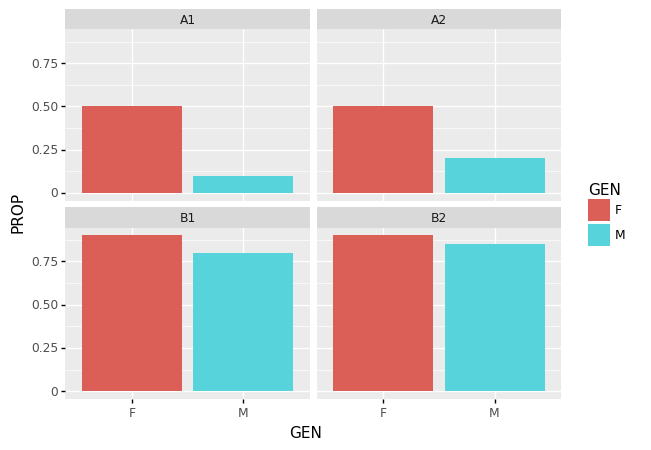

<ggplot: (8726962449285)>

In [293]:
ggplot(td.query('STATE=="PASS"'))\
+geom_bar(aes(x='GEN',y='PROP',fill='GEN'),stat='identity')\
+facet_wrap('DEP')